<div style="border-radius: 10px; padding: 5px; background-color: lightblue; font-size:200%; text-align:left">
1. Expore $\mathrm{CH_{4}}$ Laboratory Spectra

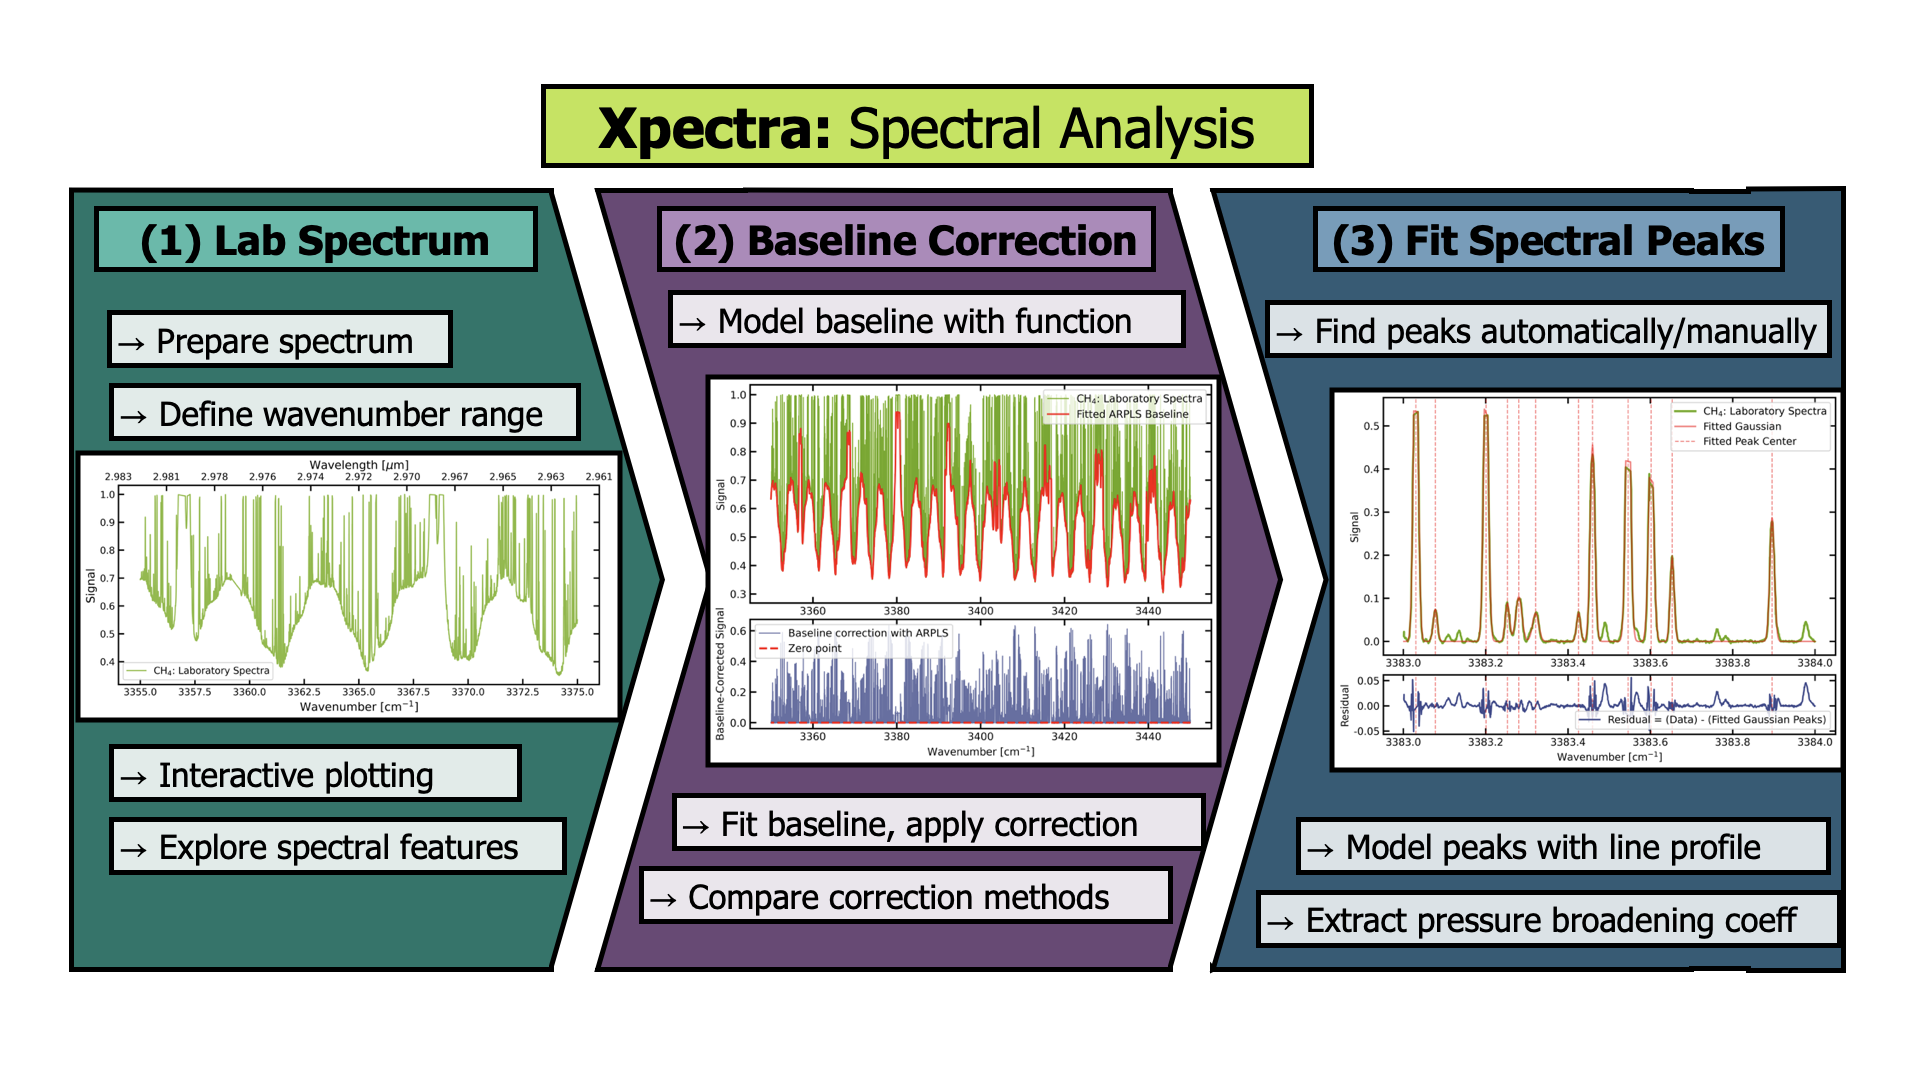

<div style="border-radius: 10px; padding: 10px; background-color: #eaeaea; font-size:100%; text-align:left">
    
### In this notebook, the following tasks will be performed using Xpectra package:

* [**1.1** | Load the laboratory spectra](#load_spectrum)
* [**1.2** | Check if there is any negative or NAN value there](#check_nan)
* [**1.3** | Visualize the spectra](#vis_spectrum)
* [**1.4** | Save it to the output directory](#save_output)

<a id="contents_tabel"></a>    
<div style="border-radius: 10px; padding: 10px; background-color: #ffdbcc; font-size:110%; text-align:left">

### ⚠️ Before following this tutorial, ensure Xpectra has been correctly installed. Have you:
1. Created the *Xpectra_project* directory
2. Downloaded *reference_data* from [this link](https://www.google.com)
3. Put the datasets, figures, and tutorials/notebooks are in your *Xpectra_project/reference_data* directory.
4. Defined the path to your *reference_data*. Confirm it using `os.getenv("Xpectra_reference_data")`, but if you encounter an error, simply hard code it by defining the path as `__reference_data_path__`.
5. Cloned *Xpectra* using git clone `https://github.com/EhsanGharibNezhad/Xpectra.git`
6. Lastly, check you are able to execute `import Xpectra`



## Directory structure:

```
Xpectra_project  
├── reference_data  
│   ├── datasets  
│   ├── figures  
│   └── processed_data  
```

In [1]:
# Import necessary modules 
from Xpectra.SpecFitAnalyzer import *
from Xpectra.SpecStatVisualizer import print_spectral_info, plot_spectra_errorbar_seaborn

<a id="load_spectrum"></a>
<div style="border-radius: 10px; padding: 5px; background-color: lightblue; font-size:170%; text-align:left">
1.1 Import $\mathrm{CH_{4}}$ lab spectrum

` Task - instead of hard coding the path, we should define env variables; see this following instruction:`


https://ehsangharibnezhad.github.io/TelescopeML/installation.html

1. create a variable named Xpectra_reference_data
2. modify these paths to laod the data (see the EDA in telescopeML notebook):
   https://ehsangharibnezhad.github.io/TelescopeML/tutorials/1__BrownDwarf_Data_Exploration.html#Load-the-dataset-and-check-few-instances


<div style="border-radius: 10px; padding: 10px; background-color: #eaeaea; font-size:100%; text-align:left">
    
### To route your operating system to the spectrum, you must first define input file environment variables. 

## For Mac OS
1. Check your default shell in your terminal:

`echo $SHELL`

This command will display the path to your default shell, typically something like /bin/bash or /bin/zsh, or /bin/sh.

2. Set the environment variables:

* If your shell is /bin/zsh:

```
echo 'export Xpectra_reference_data="/PATH_TO_YOUR_reference_data/" ' >>~/.zshrc
source ~/.zshrc
echo $Xpectra_reference_data
```

* If your shell is /bin/bash:

```
echo 'export Xpectra_reference_data="/PATH_TO_YOUR_reference_data/" ' >>~/.bash_profile
source ~/.bash_profile
echo $Xpectra_reference_data
```

* If your sell is /bin/sh:

```
echo 'export Xpectra_reference_data="/PATH_TO_YOUR_reference_data/" ' >>~/.profile
source ~/.profile
echo $Xpectra_reference_data
```

## For Linux
In Linux, the choice between ~/.bashrc and ~/.bash_profile depends on your specific use case and how you want environment variables to be set, but ~/.bashrc is a common and practical choice for modern Linux system.

```
echo 'export Xpectra_reference_data="/PATH_TO_YOUR_reference_data/" ' >>~/.bashrc
source ~/.bashrc
echo $Xpectra_reference_data
```

<div style="font-size:120%; text-align:left">
$\rightarrow$ After this setup, we can now import the $\mathrm{CH_{4}}$ spectrum as a DataFrame and seperate into two numpy arrays: x (wavenumber [$cm^{-1}$]) and y (signal).

In [2]:
# Call environment variable and assign path to data
__reference_data_path__ = os.getenv("Xpectra_reference_data")
print(__reference_data_path__)

/Users/familymader/Xpectra_project/reference_data


In [3]:
methane_spectrum = pd.read_csv(os.path.join(__reference_data_path__, 'datasets','Spectrum_CH4_100Torr.csv'))

# Create x and y arrays
x = 10**7/methane_spectrum['W'].to_numpy() # Wavenumber
y = methane_spectrum['I'].to_numpy() # Intensity

<a id="check_nan"></a>
<div style="border-radius: 10px; padding: 5px; background-color: lightblue; font-size:170%; text-align:left">
1.2 Check if there is any negative or NAN value in the data

<div style="font-size:120%; text-align:left">
$\rightarrow$ Scan arrays for negative or NAN values, print results, and return cleaned x and y 

### Xpectra.**SpecFitAnalyzer** module has 3 essential purposes: 
1. **$\rightarrow$ Process spectral data $\leftarrow$**
2. Fit and correct spectral baseline 
3. Identify and fit spectral peaks 

In [4]:
# Initialize SpecFitAnalyzer
specfit = SpecFitAnalyzer(wavenumber_values = x, signal_values = y)

In [5]:
# Check for NAN or negative values
specfit.check_negative_nan()

No NAN values.
9614 negative values found (7.78% of data)


In [6]:
specfit.negative_indeces

array([   193,    194,    195, ..., 120542, 120543, 120544])

In [7]:
specfit.nan_indeces

array([], dtype=int64)

` for sam: handle the negative values `

for Sam - I need to check my notes and have some info here 
 Convert this spectra to Absorption 

In [8]:
# Attributes updated: x,y with negative and nan deleted 
specfit.x_cleaned, specfit.y_cleaned

(array([2898.54306009, 2898.54390792, 2898.5447659 , ..., 2985.05887607,
        2985.05951532, 2985.0600492 ]),
 array([0.44029694, 0.4364364 , 0.43730026, ..., 0.45600653, 0.45858333,
        0.45689613]))

In [9]:
y = np.exp(-y)

<a id="vis_spectrum"></a>
<div style="border-radius: 10px; padding: 5px; background-color: lightblue; font-size:170%; text-align:left">
1.3 Visualize spectrum

`write a function to take x,y and pretty print these info: wl range, number of points, header if availible, Resolution, number of points,`
you might not have all these info, it is okay! I'll add to it

<div style="font-size:120%; text-align:left">
$\rightarrow$ Print information about spectrum

In [10]:
print_spectral_info(x, y, print_title='Methane Lab Spectrum')

******************************

Methane Lab Spectrum

{   'Number of points': 123527,
    'Wavenumber range (cm-1)': (   2898.5430600916807,
                                   2985.060049195717)}
******************************



`in this following func`, 
1. we do not use tuple for x, see the function: wavenumber_range: Union[list, tuple, numpy.ndarray] = None,
2. add major and minor ticks to the x and y axes
3. have a parameter to save these plots into the Xpectra_reference_data output dir; see example :
   https://ehsangharibnezhad.github.io/TelescopeML/tutorials/1__BrownDwarf_Data_Exploration.html#1.4.1-Effective-Temperature

<div style="font-size:120%; text-align:left">
$\rightarrow$ Plot spectrum and save plot

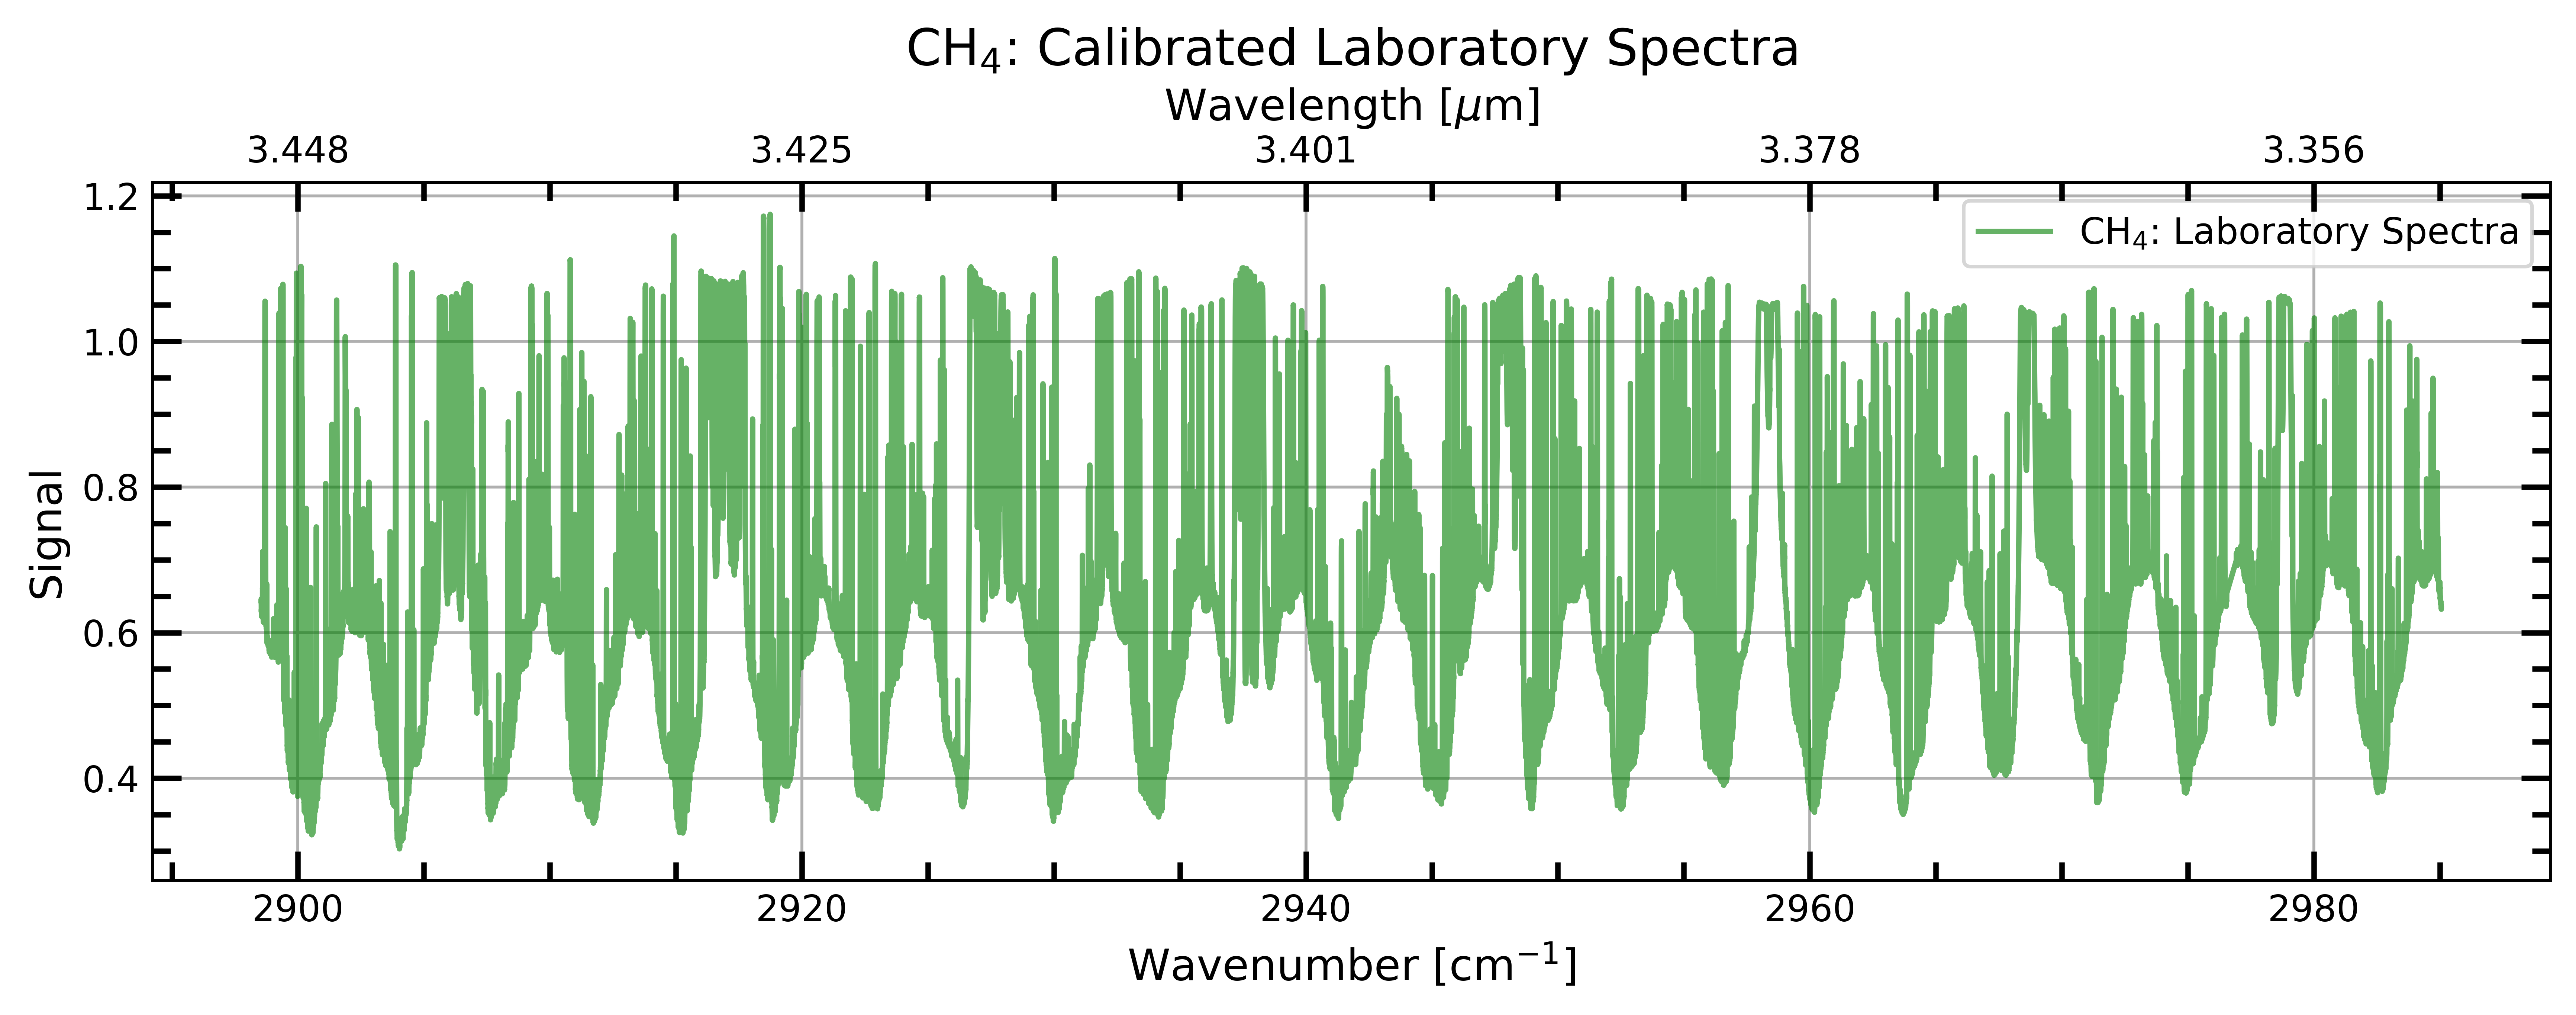

In [11]:
plot_spectra_errorbar_seaborn(wavenumber_values = x, 
                              signal_values = y,
                              __reference_data__ = __reference_data_path__, 
                              absorber_name = symbol_dict['CH4'],
                              plot_type = 'line',
                              __save_plots__ = True)

<div style="font-size:120%; text-align:left">
$\rightarrow$ Plot spectrum interactively using Bokeh, enabling zoom and panning

In [12]:
plot_spectra_errorbar_bokeh(wavenumber_values = x, 
                            signal_values = y,
                            absorber_name = 'CH4',
                            plot_type = 'line')

Loading BokehJS ...

<a id="save_output"></a>
<div style="border-radius: 10px; padding: 5px; background-color: lightblue; font-size:170%; text-align:left">
1.4 Save the processed spectra

`save the df to csv and name the columns`
- orininal data 2 cols
- processed data 2 cols

<div style="font-size:120%; text-align:left">
$\rightarrow$ Create DataFrame with original and processed spectra

In [13]:
# Create DataFrame
data = {
    'original_x': x,
    'original_y': y,
    'cleaned_x': specfit.x_cleaned,
    'cleaned_y': specfit.y_cleaned
}

df = pd.DataFrame.from_dict(data, orient='index').transpose()

In [14]:
display(df)

original_x  original_y    cleaned_x  cleaned_y
0       2898.543060    0.643845  2898.543060   0.440297
1       2898.543908    0.646336  2898.543908   0.436436
2       2898.544766    0.645778  2898.544766   0.437300
3       2898.545133    0.639101  2898.545133   0.447693
4       2898.545638    0.630384  2898.545638   0.461426
...             ...         ...          ...        ...
123522  2985.057227    0.635260          NaN        NaN
123523  2985.058132    0.635798          NaN        NaN
123524  2985.058876    0.633810          NaN        NaN
123525  2985.059515    0.632179          NaN        NaN
123526  2985.060049    0.633246          NaN        NaN

[123527 rows x 4 columns]

<div style="font-size:120%; text-align:left">
$\rightarrow$ Save the spectra to CSV file

In [15]:
df.to_csv(os.path.join(__reference_data_path__,'processed_data','processed_methane_spectrum.csv'), index=False)